# Import the libraries

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

**Define the image size according to the standard set and Define the training path and testing path of the images**

In [2]:
IMAGE_SIZE = [224, 224]
train_path = '../input/cotton-disease-dataset/Cotton Disease/train'
valid_path = '../input/cotton-disease-dataset/Cotton Disease/test'

**Load the pre-trained model InceptionV3 and define the weights and input image size**

In [3]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

2022-10-01 12:43:14.804553: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


87924736/87910968 [==============================] - 0s 0us/step


weights='imagenet' means that we will use pre-trained weights of the imagenet which was used to train the inceptionV3 model.

**No need to train the existing weights**

In [4]:
for layers in inception.layers:
    layers.trainable=False

**flatten the output**

In [5]:
# our layers - you can add more if you want
x=Flatten()(inception.output)

**Use glob to get total categories so that we can add it at the bottom of our network**

In [6]:
# used to get number output classes
folders=glob('../input/cotton-disease-dataset/Cotton Disease/train/*')
folders

['../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant',
 '../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton leaf',
 '../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant',
 '../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton leaf']

**Find the predictions and feed it to the model and Creating model object**

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [8]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Use Image Data generator to import images from folder and for data augmentation**

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [12]:
r=model.fit(training_set, validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

2022-10-01 12:43:19.722087: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
61/61 [==============================] - 139s 2s/step - loss: 1.5750 - accuracy: 0.7724 - val_loss: 0.5452 - val_accuracy: 0.8585
Epoch 2/20
61/61 [==============================] - 127s 2s/step - loss: 0.5485 - accuracy: 0.9011 - val_loss: 0.4458 - val_accuracy: 0.8868
Epoch 3/20
61/61 [==============================] - 127s 2s/step - loss: 0.5929 - accuracy: 0.8954 - val_loss: 0.3048 - val_accuracy: 0.8868
Epoch 4/20
61/61 [==============================] - 127s 2s/step - loss: 0.7845 - accuracy: 0.8898 - val_loss: 1.2825 - val_accuracy: 0.8302
Epoch 5/20
61/61 [==============================] - 127s 2s/step - loss: 0.8238 - accuracy: 0.9108 - val_loss: 1.0870 - val_accuracy: 0.9151
Epoch 6/20
61/61 [==============================] - 127s 2s/step - loss: 0.4427 - accuracy: 0.9364 - val_loss: 0.6380 - val_accuracy: 0.9340
Epoch 7/20
61/61 [==============================] - 127s 2s/step - loss: 0.5422 - accuracy: 0.9247 - val_loss: 0.3984 - val_accuracy: 0.9434
Epoch 8/20
61

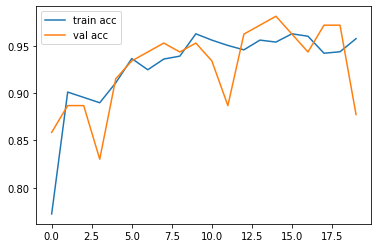

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the accuracy InceptionV3
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

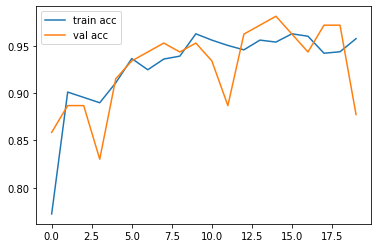

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the accuracy InceptionV3
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Resnet152V2

**Load the pre-trained model Resnet152V2 and define the weights and input image size**

In [15]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234561536/234545216 [==============================] - 1s 0us/step


**Do not train the existing weights**

In [16]:
for layer in resnet152V2.layers:
    layer.trainable=False

 **Now flatten the output**

In [17]:
# our layers - you can add more if you want
x=Flatten()(resnet152V2.output)

**Find the predictions and feed it to the model and Creating model object for Resnet152V2**

In [18]:
preduction2=Dense(len(folders),activation='softmax')(x)
model2=Model(inputs=resnet152V2.input,outputs=preduction2)

In [19]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
r2 = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 423s 7s/step - loss: 1.0424 - accuracy: 0.8385 - val_loss: 0.4373 - val_accuracy: 0.9151
Epoch 2/10
61/61 [==============================] - 408s 7s/step - loss: 0.5065 - accuracy: 0.9288 - val_loss: 0.1723 - val_accuracy: 0.9623
Epoch 3/10
61/61 [==============================] - 406s 7s/step - loss: 0.3133 - accuracy: 0.9452 - val_loss: 0.5375 - val_accuracy: 0.9623
Epoch 4/10
61/61 [==============================] - 408s 7s/step - loss: 0.4090 - accuracy: 0.9508 - val_loss: 0.7316 - val_accuracy: 0.9245
Epoch 5/10
61/61 [==============================] - 405s 7s/step - loss: 0.4781 - accuracy: 0.9487 - val_loss: 0.5469 - val_accuracy: 0.9340
Epoch 6/10
61/61 [==============================] - 404s 7s/step - loss: 0.3677 - accuracy: 0.9605 - val_loss: 0.8484 - val_accuracy: 0.9340
Epoch 7/10
61/61 [==============================] - 406s 7s/step - loss: 0.2701 - accuracy: 0.9698 - val_loss: 0.7410 - val_accuracy: 0.9245
Epoch 8/10
61

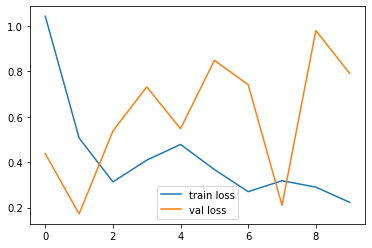

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss resnet152v2
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

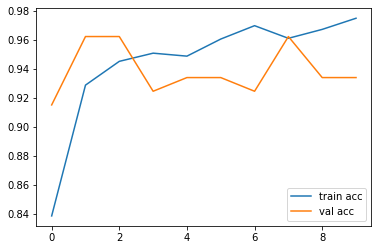

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the accuracy resnet152v2
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# VGG16

In [23]:
vgg16 = tensorflow.keras.applications.VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
for layer in vgg16.layers:
    layer.trainable = False

In [25]:
# Flatten the input
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [26]:
prediction3 = Dense(len(folders), activation='softmax')(x)

#create a model object
model3 = Model(inputs=vgg16.input, outputs=prediction3)

In [27]:
# Model Summary
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [28]:
model3.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [29]:
# Fit the model
r3 = model3.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 527s 9s/step - loss: 0.6610 - accuracy: 0.7499 - val_loss: 0.3358 - val_accuracy: 0.8396
Epoch 2/20
61/61 [==============================] - 528s 9s/step - loss: 0.2449 - accuracy: 0.9118 - val_loss: 0.2919 - val_accuracy: 0.8868
Epoch 3/20
61/61 [==============================] - 529s 9s/step - loss: 0.1879 - accuracy: 0.9236 - val_loss: 0.1731 - val_accuracy: 0.9340
Epoch 4/20
61/61 [==============================] - 529s 9s/step - loss: 0.1697 - accuracy: 0.9318 - val_loss: 0.1207 - val_accuracy: 0.9623
Epoch 5/20
61/61 [==============================] - 528s 9s/step - loss: 0.1105 - accuracy: 0.9626 - val_loss: 0.1103 - val_accuracy: 0.9717
Epoch 6/20
61/61 [==============================] - 529s 9s/step - loss: 0.0924 - accuracy: 0.9703 - val_loss: 0.1532 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 529s 9s/step - loss: 0.0903 - accuracy: 0.9713 - val_loss: 0.1107 - val_accuracy: 0.9434
Epoch 8/20
61

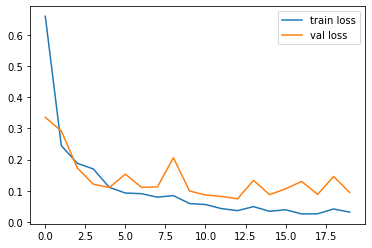

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss vgg16
plt.plot(r3.history['loss'], label='train loss')
plt.plot(r3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

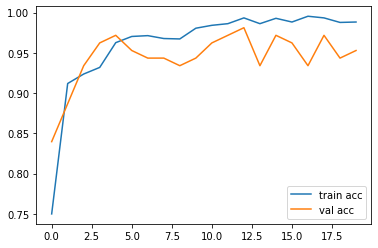

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the accuracy vgg16
plt.plot(r3.history['accuracy'], label='train acc')
plt.plot(r3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')